## Bussiness Understanding


### Objetivo do Projeto

O objetivo deste projeto é realizar uma análise descritiva dos dados de uso do Spotify do usuário, com a finalidade de compreender seu comportamento musical ao longo do tempo.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os 

## Data Understanding


Arquivo1


In [ ]:
df = pd.read_json('historico_musicas.json')

df.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-09-24T12:38:12Z,"Android OS 10 API 29 (Xiaomi, Redmi Note 9S)",0,BR,179.226.183.56,Baile do Cinga do 12,MC Gontijo,Baile do Cinga do 12,spotify:track:2uLt06E9xCZVPFXg9v794o,None,...,NaN,NaN,NaN,clickrow,unexpected-exit,False,False,False,NaN,False
1,2021-09-24T12:38:12Z,"Android OS 10 API 29 (Xiaomi, Redmi Note 9S)",0,BR,179.226.183.56,Baile do Cinga do 12,MC Gontijo,Baile do Cinga do 12,spotify:track:2uLt06E9xCZVPFXg9v794o,None,...,NaN,NaN,NaN,clickrow,unexpected-exit,False,False,False,NaN,False
2,2021-09-24T12:45:25Z,"Android OS 10 API 29 (Xiaomi, Redmi Note 9S)",91975,BR,179.226.183.56,Baile do Cinga do 12,MC Gontijo,Baile do Cinga do 12,spotify:track:2uLt06E9xCZVPFXg9v794o,None,...,NaN,NaN,NaN,clickrow,trackdone,False,False,False,NaN,False
3,2021-09-24T12:45:27Z,"Android OS 10 API 29 (Xiaomi, Redmi Note 9S)",1770,BR,179.226.183.56,BALANÇA A GLOCK,Mc Jajau,BALANÇA A GLOCK,spotify:track:4PUjVQcrNhH85XXyXnnjBd,None,...,NaN,NaN,NaN,trackdone,backbtn,False,False,False,NaN,False
4,2021-09-24T12:45:30Z,"Android OS 10 API 29 (Xiaomi, Redmi Note 9S)",2353,BR,179.226.183.56,Menina Se Prepara,Mc Pepeu,Menina Se Prepara,spotify:track:2aqqXrjrPdRHU9uSeRmL3C,None,...,NaN,NaN,NaN,backbtn,endplay,False,False,False,NaN,False


In [ ]:
# Media de tempo escutado por musica 

minutos = df['ms_played'].mean() / 60000  


segundos = (minutos - int(minutos)) * 60

print(f"{int(minutos)} min e {int(segundos)} seg")


1 min e 35 seg


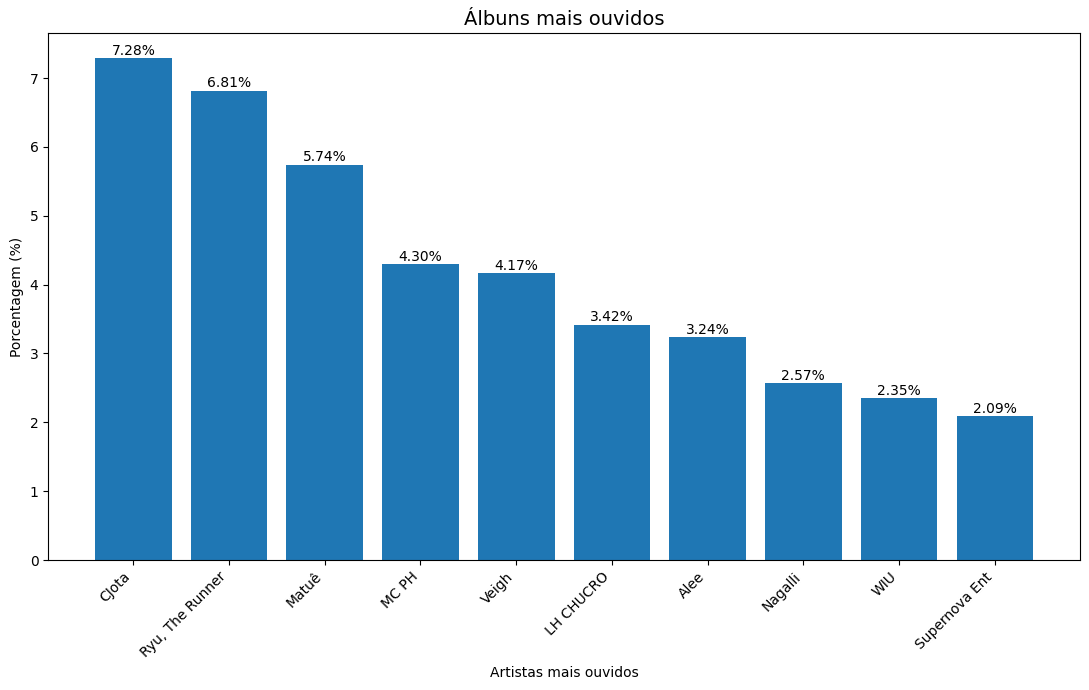

In [40]:
## 10 Artistas mais ouvidos
status_vals = df["master_metadata_album_artist_name"].value_counts().head(10)

percentages = (status_vals / df.shape[0]) * 100

percentages = percentages.sort_values(ascending=False)

plt.figure(figsize=(11, 7))

plt.bar(percentages.index, percentages.values)

plt.title("Álbuns mais ouvidos", fontsize=14)
plt.xlabel("Artistas mais ouvidos")
plt.ylabel("Porcentagem (%)")

plt.xticks(rotation=45, ha="right")

# Coloca os valores na barra 
for i, v in enumerate(percentages.values):
    plt.text(i, v + 0.05, f"{v:.2f}%", ha="center")

plt.tight_layout()
plt.show()


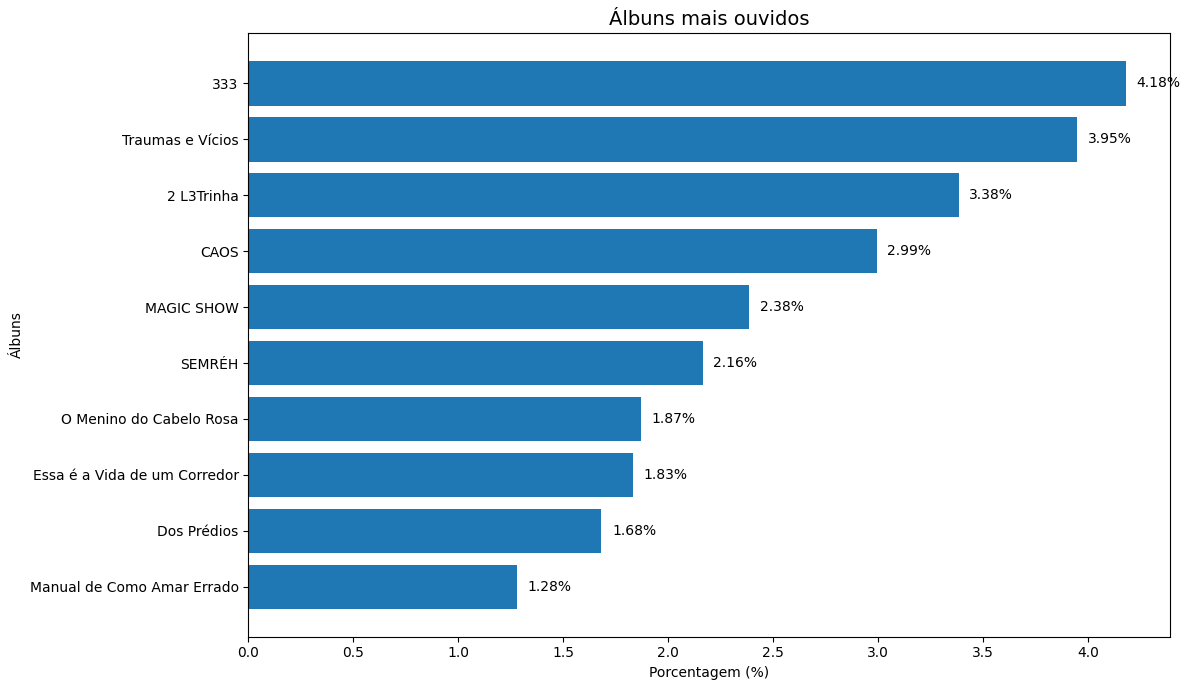

In [41]:
# Top 10 álbuns mais ouvidos
status_vals = df["master_metadata_album_album_name"].value_counts().head(10)

percentages = (status_vals / df.shape[0]) * 100

percentages = percentages.sort_values()

plt.figure(figsize=(12, 7))

plt.barh(percentages.index, percentages.values)

plt.title("Álbuns mais ouvidos", fontsize=14)
plt.xlabel("Porcentagem (%)")
plt.ylabel("Álbuns")

for i, v in enumerate(percentages.values):
    plt.text(v + 0.05, i, f"{v:.2f}%", va="center")

# ajusta layolt da figura
plt.tight_layout()
plt.show()


In [ ]:

df["ts"] = pd.to_datetime(df["ts"])

df["month"] = df["ts"].dt.to_period("M").astype(str)

df["minutes"] = df["ms_played"] / 60000

df_monthly = (
    df
    .groupby("month")["minutes"]
    .sum()
    .reset_index()
    .sort_values("month")
)

df_monthly


C:\Users\guilhermetsouza-ieg\AppData\Local\Temp\ipykernel_18228\168371795.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["ts"].dt.to_period("M").astype(str)


,month,minutes
0,2021-09,13.328217
1,2021-10,127.931000
2,2021-11,98.317517
3,2021-12,35.551717
4,2022-06,5.912867
5,2022-12,13.013483
6,2023-03,11.682750
7,2023-04,145.977850
8,2023-05,132.202783
9,2023-08,20.067750


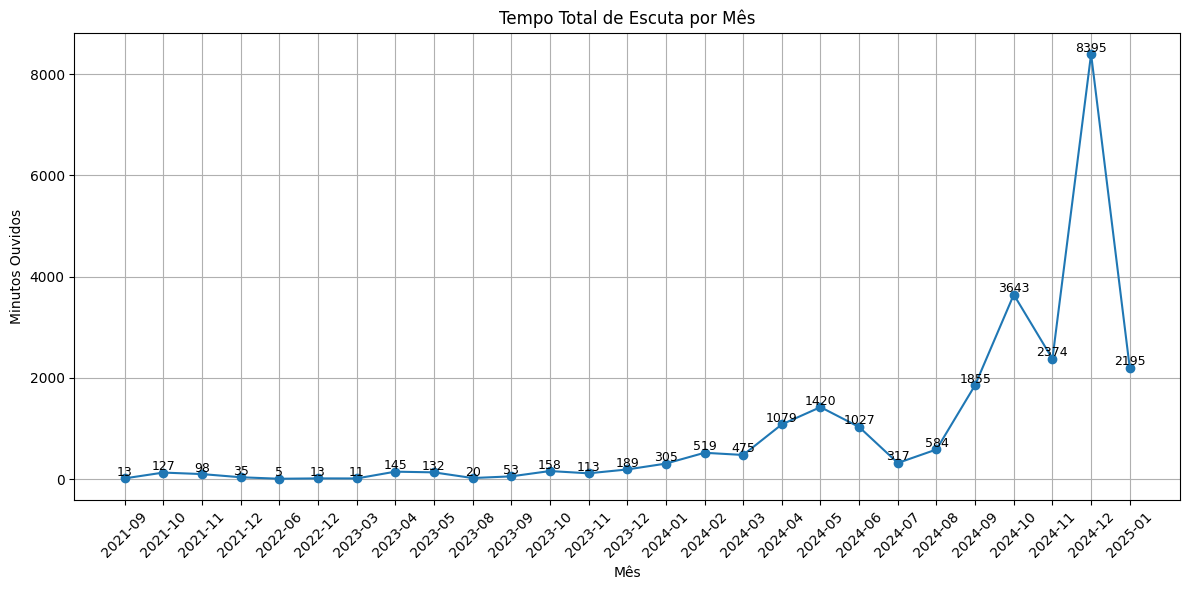

In [57]:
plt.figure(figsize=(12, 6))

plt.plot(
    df_monthly["month"],
    df_monthly["minutes"],
    marker="o"
)

# Adicionar valores em cada ponto
for i, value in enumerate(df_monthly["minutes"]):
    plt.text(
        i, 
        value + 50,              # Ajuste da altura do texto
        f"{int(value)}",         # Valor inteiro
        ha="center",
        fontsize=9
    )

plt.title("Tempo Total de Escuta por Mês")
plt.xlabel("Mês")
plt.ylabel("Minutos Ouvidos")

plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

arquivo2


In [42]:
with open("capsula_tempo.json", "r", encoding="utf-8") as f:
    data = json.load(f)

print(data)



{'stats': [{'date': '2026-01-19', 'streamCount': 0, 'secondsPlayed': 0, 'topTracks': [{'name': 'CÂMERA LENTA', 'streamCount': 6, 'secondsPlayed': 877}, {'name': 'Black', 'streamCount': 3, 'secondsPlayed': 717}, {'name': 'Tipping Point', 'streamCount': 3, 'secondsPlayed': 655}, {'name': 'JAPONÊS', 'streamCount': 3, 'secondsPlayed': 576}, {'name': 'Ride The Lightning (Bonus Track)', 'streamCount': 2, 'secondsPlayed': 188}, {'name': 'Invisível pt.2', 'streamCount': 2, 'secondsPlayed': 348}, {'name': 'TENTAR SER BREVE 🤷🏾\u200d♀️', 'streamCount': 2, 'secondsPlayed': 446}, {'name': '04AM', 'streamCount': 2, 'secondsPlayed': 398}, {'name': 'Walk', 'streamCount': 2, 'secondsPlayed': 358}, {'name': 'Imagina esse Cenário', 'streamCount': 2, 'secondsPlayed': 300}], 'topArtists': [{'name': 'Megadeth', 'streamCount': 11, 'secondsPlayed': 1677}, {'name': 'Nagalli', 'streamCount': 10, 'secondsPlayed': 1510}, {'name': 'Matuê', 'streamCount': 8, 'secondsPlayed': 1308}, {'name': 'Veigh', 'streamCount': 

## Data Prepare


In [43]:
rows = []

for item in data["stats"]:
    
    # só pega meses (ignora semanas/dias tipo 2026-01-19)
    if len(item["date"]) == 7:  # formato YYYY-MM
        
        top_artist = item["topArtists"][0]  # Top 1
        
        rows.append({
            "date": item["date"],
            "artist": top_artist["name"],
            "minutes_played": top_artist["secondsPlayed"] / 60
        })

df_artists = pd.DataFrame(rows)

df_artists


,date,artist,minutes_played
0,2026-01,Nirvana,112.566667
1,2025-12,CJota,233.350000
2,2025-11,Alee,90.100000
3,2025-10,Nirvana,306.866667
4,2025-09,Alee,387.000000
5,2025-08,Metallica,826.350000
6,2025-07,Metallica,787.600000
7,2025-06,System Of A Down,392.383333
8,2025-05,System Of A Down,972.183333
9,2025-04,System Of A Down,398.566667


In [ ]:
#teste 
